# Importing CIFAR dataset 

In [10]:
CIFAR_DIR = 'cifar-10-batches-py/'

In [11]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        cifar_dict = pickle.load(fo, encoding = 'bytes')
    return cifar_dict

In [12]:
dirs = ['batches.meta', 'data_batch_1', 'data_batch_2', 'data_batch_3', 'data_batch_4', 'data_batch_5', 'test_batch']

In [13]:
all_data = [0,1,2,3,4,5,6]

In [14]:
for i,direc in zip(all_data,dirs):
    all_data[i] = unpickle(CIFAR_DIR + direc)

In [15]:
batch_meta = all_data[0]
data_batch1 = all_data[1]
data_batch2 = all_data[2]
data_batch3 = all_data[3]
data_batch4 = all_data[4]
data_batch5 = all_data[5]
test_batch = all_data[6]

In [16]:
batch_meta

{b'num_cases_per_batch': 10000,
 b'label_names': [b'airplane',
  b'automobile',
  b'bird',
  b'cat',
  b'deer',
  b'dog',
  b'frog',
  b'horse',
  b'ship',
  b'truck'],
 b'num_vis': 3072}

# Displaying images using matplotlib

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

In [24]:
X = data_batch1[b"data"]

In [33]:
X = X.reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("uint8")

In [34]:
X[0].max()

255

In [35]:
(X[0]/255).max()

1.0

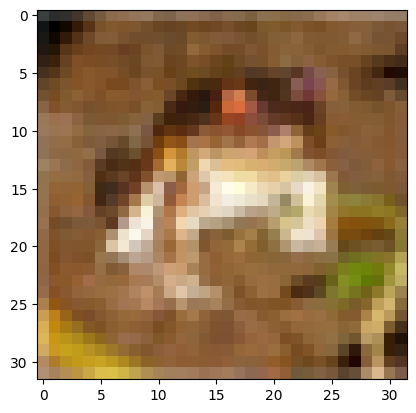

In [36]:
plt.imshow(X[0])

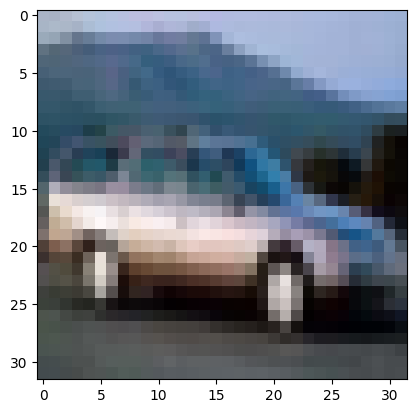

In [37]:
plt.imshow(X[4])

# Helper function for handling data

In [38]:
def one_hot_encode(vec, vals=10):
    n = len(vec)
    out = np.zeros((n, vals))
    out[range(n), vec] = 1
    return out

In [ ]:
class CifarHelper():
    
    def __init__(self):
        self.i = 0
        
        self.all_train_batches = [data_batch1,data_batch2,data_batch3,data_batch4,data_batch5]
        self.test_batch = [test_batch]
        
        self.training_images = None
        self.training_labels = None
        
        self.test_images = None
        self.test_labels = None
        
    def set_up_images(self):
        
        print("Setting Up Training Images and Labels")
        
        self.training_images = np.vstack([d[b"data"] for d in self.all_tain_batches])
        train_len = len(self.training_images)
        
        self.training_images = self.training_images.reshape(train_len, 3, 32, 32).transpose(0,2,3,1)/255
        
        print("Setting Up Test Images and Labels")
        
        self.test_images = np.vstack([d[b"data"] for d in self.test_batch])
        test_len = len(self.test_images)
        
        self.